# Google Play EDA and Basic Sentiment

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

Data brovided by Kaggle

## Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

import re

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# datetime
import datetime

## Load Data

In [2]:
df = pd.read_csv('/Users/alex/Documents/google-play-store-apps/googleplaystore.csv')
reviews = pd.read_csv('/Users/alex/Documents/google-play-store-apps/googleplaystore_user_reviews.csv')

print(df.shape)
print(reviews.shape)

(10841, 13)
(64295, 5)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Preparation

In [4]:
# drop bad rows
df = df[df['Category']!='1.9']
df.drop(index=9148, inplace=True)

In [5]:
# drop duplicates
df.drop_duplicates(subset='App', keep="last", inplace=True)

In [6]:
# convert col to int
df['Reviews'] = df['Reviews'].astype(int)

In [7]:
# extract number from string and create float col
df['Size'] = df['Size'].apply(lambda x: re.findall('\d*\.\d+|\d+', x))
df['Size'][df['Size'].str.len() == 0] = '0'
df['Size']=df['Size'].apply(lambda x: x[0]).astype(float)

In [8]:
# extract number from string and create int col
df['Installs'] = df['Installs'].apply(lambda x: re.sub('[^0-9]', '', x)).astype(int)

In [9]:
# extract number from string and create float col
df['Price'] = df['Price'].apply(lambda x: re.findall('\d*\.\d+|\d+', x))
df['Price']=df['Price'].apply(lambda x: x[0]).astype(float)

In [10]:
# parse dates
df['Last Updated'] = df['Last Updated'].apply(lambda x: datetime.datetime.strptime(x, "%B %d, %Y"))

## EDA

 - EDA category and genres: df.groupby('Category').Genres.nunique()
 - number of apps, count reviews, free vs paid

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [12]:
# number of unique values in each column
df.nunique()

App               9658
Category            33
Rating              39
Reviews           5332
Size               421
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2818
Android Ver         33
dtype: int64

### EDA by App Category

Text(0.5, 1.0, 'Number of App by Categories')

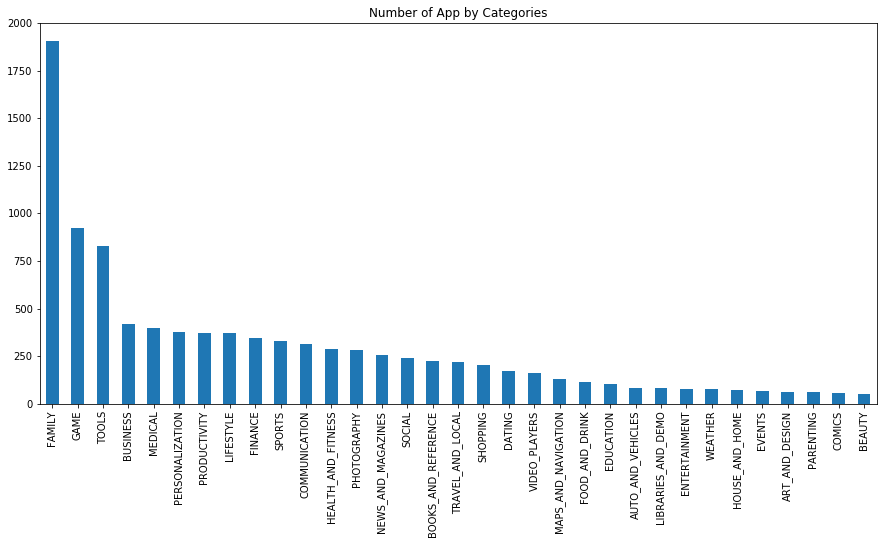

In [13]:
# apps categories
plt.figure (figsize=(15,7))
df['Category'].value_counts().plot(kind='bar').set_title('Number of App by Categories')

#### App Categories by Type (free/payed)

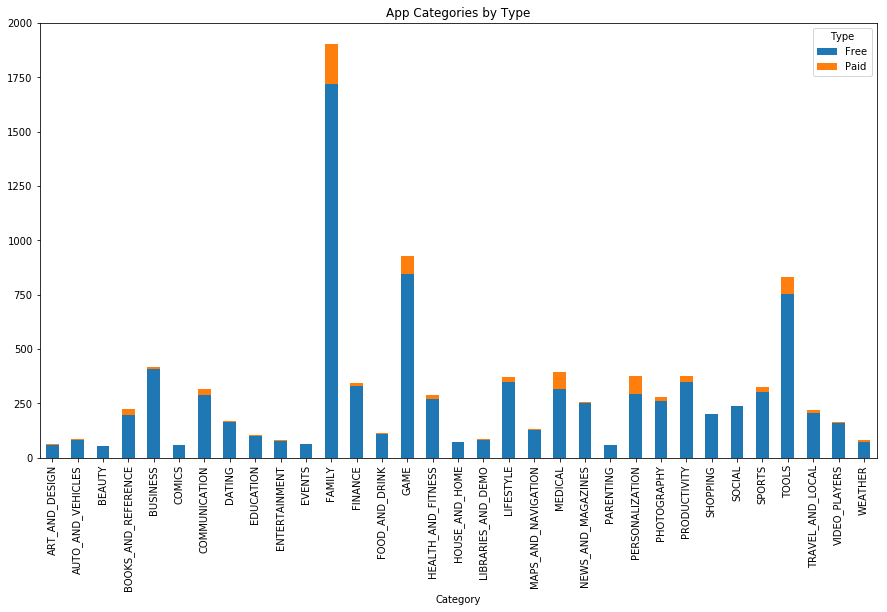

In [14]:
# apps categogory by type
ax = df.groupby(['Category', 'Type']).App.count().unstack('Type').plot(kind='bar', stacked=True, figsize=(15,8),
                                                                 title = 'App Categories by Type')

#### App Categories by Content Rating

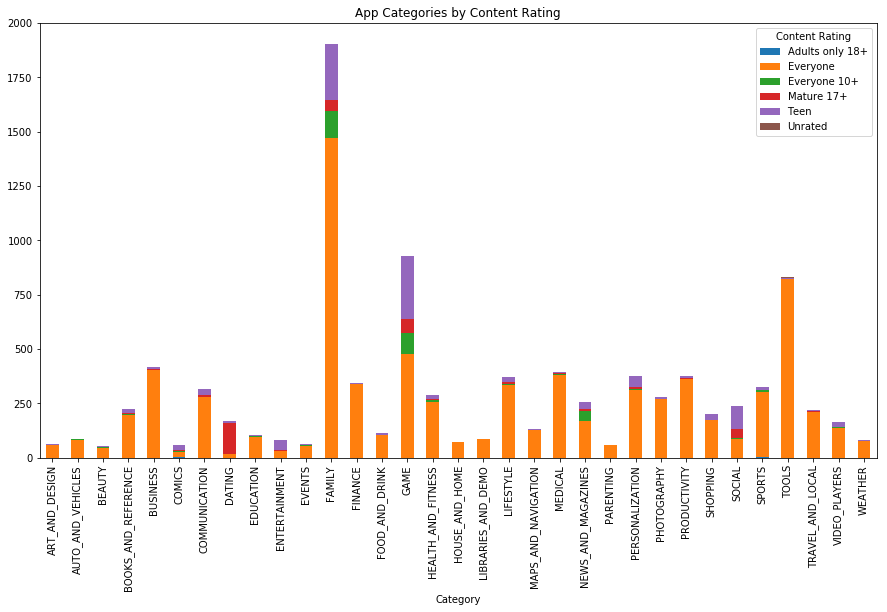

In [15]:
# apps category by content rating
df.groupby(['Category', 'Content Rating']).App.count().unstack('Content Rating').plot(kind='bar',
                                    stacked=True, figsize=(15,8), title = 'App Categories by Content Rating')

#### Most Popular Genreses by App Category

In [16]:
# uniwque Genres by app category
df.groupby('Category')['Genres'].nunique().sort_values(ascending=False)[:10]

Category
FAMILY              72
GAME                18
EDUCATION            5
ENTERTAINMENT        4
PARENTING            4
COMICS               2
LIFESTYLE            2
ART_AND_DESIGN       2
TOOLS                2
TRAVEL_AND_LOCAL     2
Name: Genres, dtype: int64

##### FAMILY Category

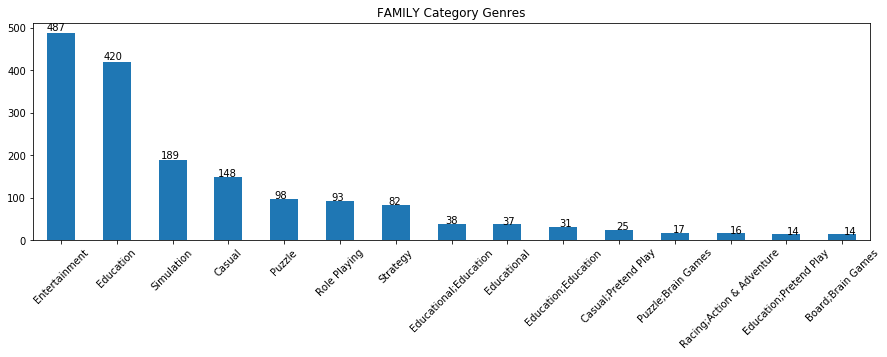

In [17]:
# Family category genres
ax = df[df['Category']== 'FAMILY']['Genres'].value_counts()[:15].plot(kind='bar',
                                    stacked=True, figsize=(15,4), title = 'FAMILY Category Genres', rot=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))

##### GAME Category

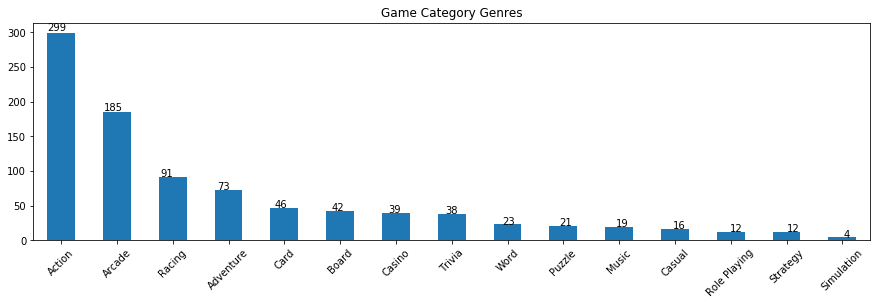

In [18]:
# Game category genres
ax = df[df['Category']== 'GAME']['Genres'].value_counts()[:15].plot(kind='bar',
                                    stacked=True, figsize=(15,4), title = 'Game Category Genres', rot=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))

##### EDUCATION Category

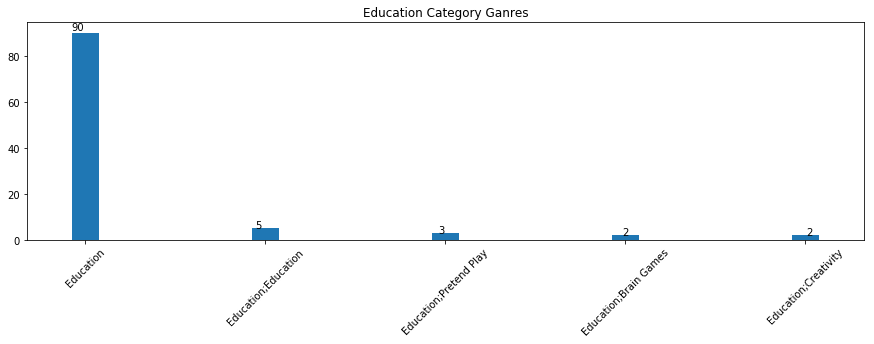

In [19]:
# Education category ganres
ax = df[df['Category']== 'EDUCATION']['Genres'].value_counts()[:15].plot(kind='bar', width=0.15,
                                    stacked=True, figsize=(15,4), title = 'Education Category Ganres', rot=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))

##### ENTERTAINMENT Category

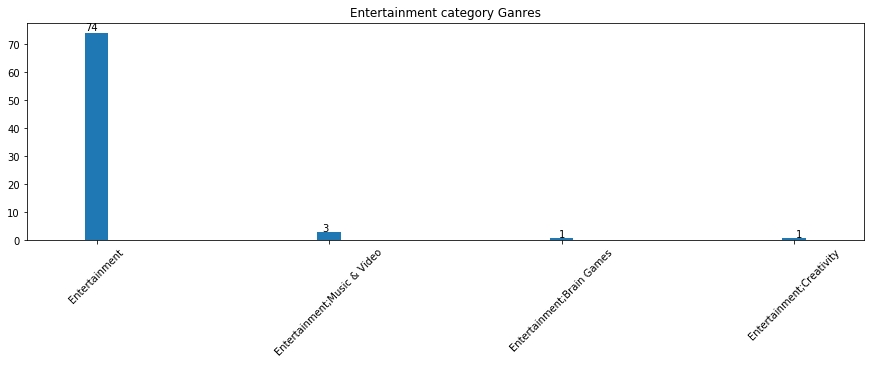

In [20]:
# Entertainment catgory ganres
ax = df[df['Category']== 'ENTERTAINMENT']['Genres'].value_counts()[:15].plot(kind='bar', width=0.1,
                                    stacked=True, figsize=(15,4), title = 'Entertainment category Ganres', rot=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))

### Ganres EDA

#### Most Polular Genreses by Developers

In [21]:
# 25 most popular ganres
pop_genres_cols = df.groupby('Genres').App.count().sort_values(ascending=False)[:25].index


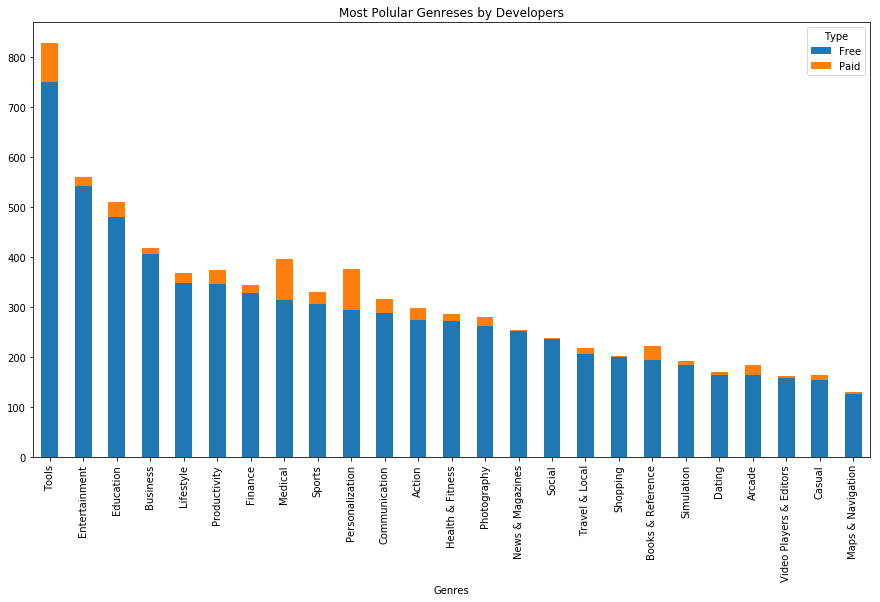

In [22]:
# 25 most popular ganres by type
ax = df.loc[df['Genres'].isin(pop_genres_cols)].groupby(['Genres', 'Type']).App.count().unstack(
    'Type').sort_values(by='Free', ascending=False).plot(kind='bar', stacked=True, figsize=(15,8),
                                                         title = 'Most Polular Genreses by Developers')




### Reviews EDA

#### ECDF

In [23]:
# cumulative distribution function
def ecdf(data):
    """ECDF for a 1D array"""
    
    n = len(data)
    x = np.sort(data)    
    y = np.arange(1, n+1) / n

    return x, y

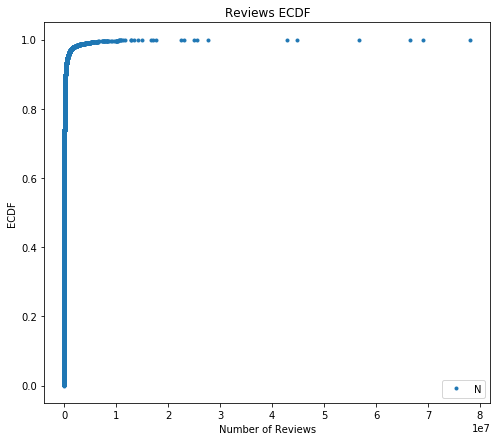

In [24]:
# cumulative distribution of reviews
plt.figure(figsize=(8, 7))
x_30, y_30 = ecdf(df.Reviews)

plt.plot(x_30, y_30, marker='.', linestyle='none')

plt.legend(('Number of Reviews'), loc='lower right')
plt.title('Reviews ECDF')
plt.xlabel('Number of Reviews')
plt.ylabel('ECDF')

plt.show()

 - Reviews exponentially distributed
 - 6 extreme outliers with more than 40 mln reviews

#### Extrime Outliers

In [25]:
# apps with 40+ mln reviews
df[df.Reviews > 4e7][['App', 'Reviews']].sort_values(by='Reviews', ascending=False).reset_index().drop('index', axis=1)

,App,Reviews
0,Facebook,78128208
1,WhatsApp Messenger,69109672
2,Instagram,66509917
3,Messenger – Text and Video Chat for Free,56642847
4,Clash of Clans,44881447
5,Clean Master- Space Cleaner & Antivirus,42916526


#### Other Outliers

In [26]:
# apps with 15+ reviews
df[(df.Reviews > 1.5e7) & (df.Reviews < 3e7)][['App', 'Reviews']].sort_values(by='Reviews', ascending=False).reset_index().drop('index', axis=1)

,App,Reviews
0,Subway Surfers,27711703
1,YouTube,25623548
2,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
3,Clash Royale,23125280
4,Candy Crush Saga,22419455
5,UC Browser - Fast Download Private & Secure,17712922
6,Snapchat,17000166
7,"360 Security - Free Antivirus, Booster, Cleaner",16771865


#### Filter out Review Outliers

In [27]:
# revove outliers
df = df[df.Reviews <= 1.5e7]

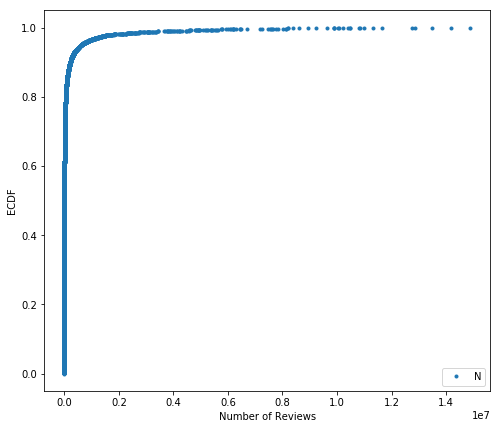

In [28]:
# cumulative distribution of reviews without outliers
plt.figure(figsize=(8, 7))
x_30, y_30 = ecdf(df.Reviews)

plt.plot(x_30, y_30, marker='.', linestyle='none')

plt.legend(('Number of Reviews'), loc='lower right')
plt.xlabel('Number of Reviews')
plt.ylabel('ECDF')

plt.show()

#### Log Distribution of Reviews (KDE plot)

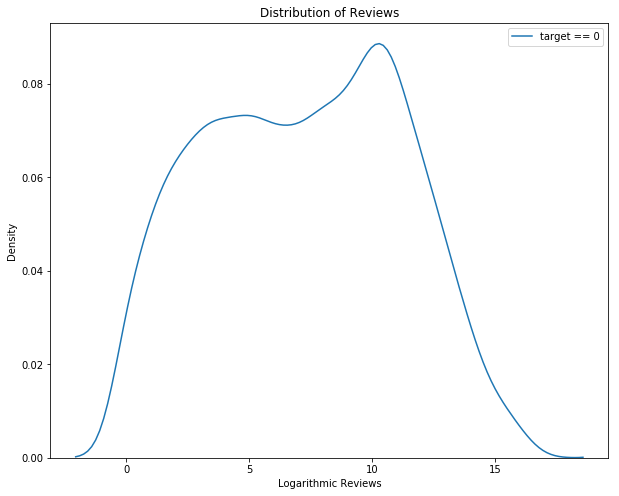

In [29]:
# kde plot 
plt.figure(figsize = (10, 8))

# KDE plot of reviews that were repaid on time
sns.kdeplot(np.log(df.Reviews), label = 'target == 0')

# Labeling of plot
plt.xlabel('Logarithmic Reviews'); plt.ylabel('Density'); plt.title('Distribution of Reviews');

#### Reviews by Category

In [30]:
# reviews statistics (without outliers)
df.Reviews.describe().round(0)

count        9644.0
mean       161674.0
std        804215.0
min             0.0
25%            25.0
50%           963.0
75%         29177.0
max      14885236.0
Name: Reviews, dtype: float64

In [31]:
# reviews by category
rev_cat = []
for col in df.Category.unique():
    rev_cat.append(np.array(df[df['Category']==col]['Reviews']))

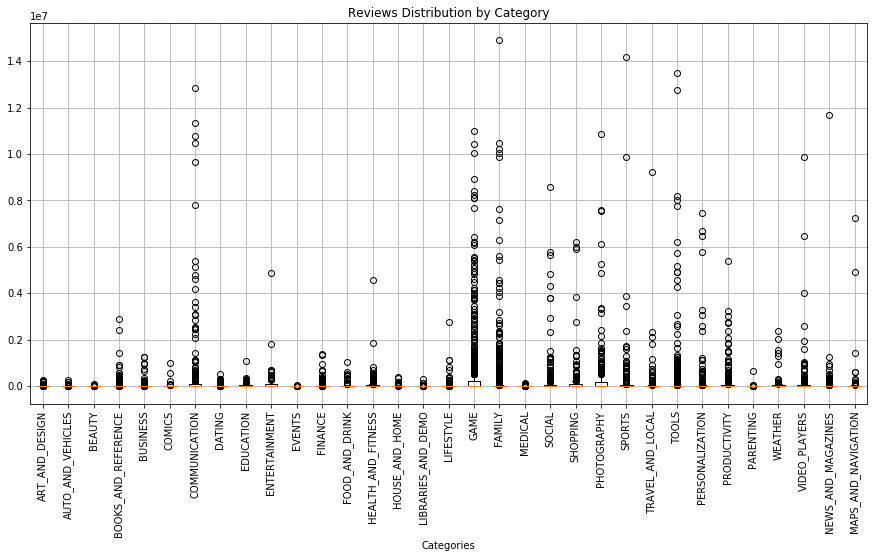

In [32]:
# reviews distributuons by category
plt.figure(figsize=(15, 7))

plt.boxplot(rev_cat)
plt.title('Reviews Distribution by Category')

plt.grid(True)
plt.xticks(np.arange(len(df.Category.unique()))+1, labels=np.array(df.Category.unique()), rotation=90)
plt.xlabel('Categories')

plt.show()

#### Reviews Correlations

In [33]:
# check correlations with the target and sort
correlations = df.corr()['Reviews'].sort_values()

correlations

Price      -0.012832
Size       -0.012434
Rating      0.096271
Installs    0.569869
Reviews     1.000000
Name: Reviews, dtype: float64

##### Log correlationn with Installs

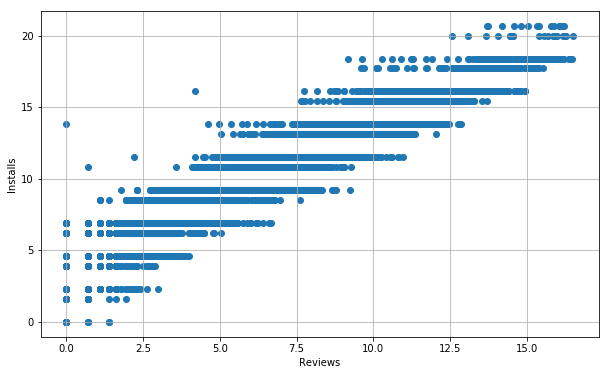

In [38]:
# log correlation of Installs and reviews
plt.figure(figsize=(10,6))

plt.scatter(np.log(df.Reviews), np.log(df.Installs))

plt.grid(True)
plt.xlabel('Reviews')
plt.ylabel('Installs')

plt.show()

### App Rating EDA

#### Rating Total Distribution

In [39]:
# app rating statistics
df.Rating.describe()

count    8182.000000
mean        4.172794
std         0.536544
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Median total rating: 4.3

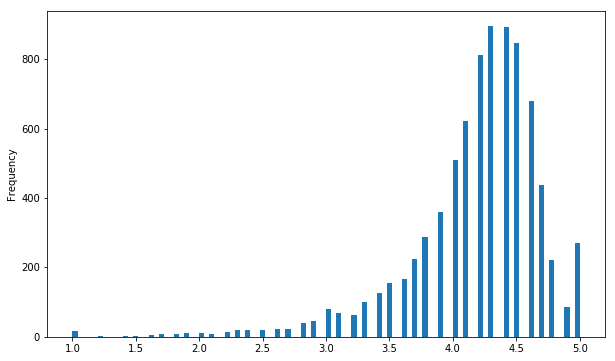

In [40]:
# distribution of overall rating
plt.figure(figsize=(10,6))
df.Rating.plot.hist(bins=100)

#### Rating Distribution by Category

##### Overall Distribution by Category

Text(0.5, 1.0, 'Rating by Category')

<Figure size 432x720 with 0 Axes>

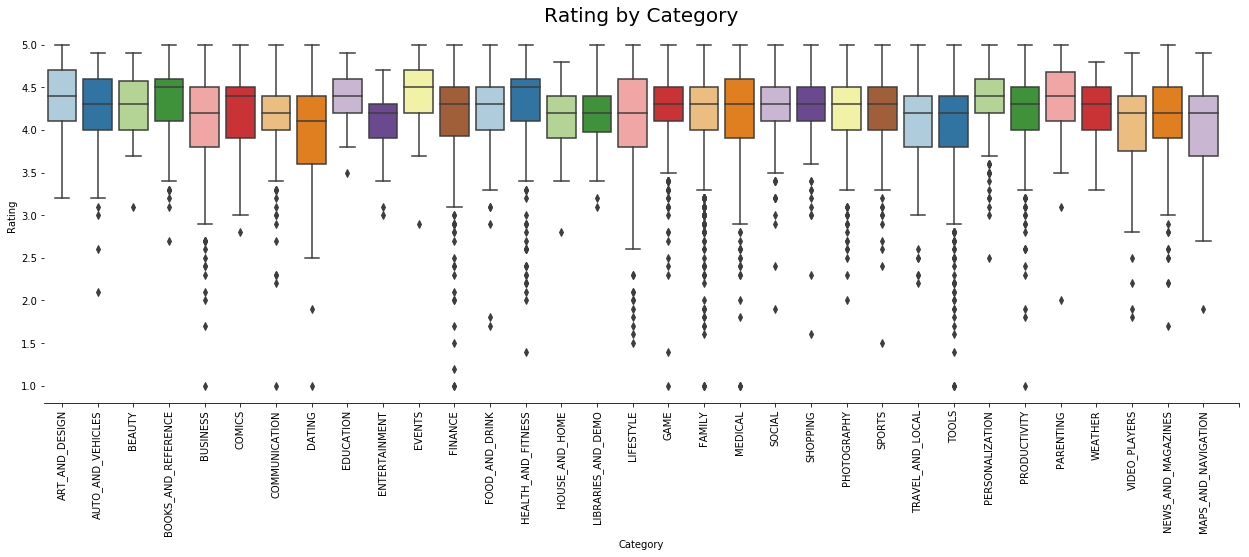

In [41]:
# Rating distributon boxplots by app category
plt.figure(figsize=(6, 10))

g = sns.catplot(x="Category",y="Rating",data=df, kind="box", aspect= 3, height=6,
palette = "Paired")
g.despine(left=True)

g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")

plt.title('Rating by Category', size=20)

##### Paid Apps Distribution

Text(0.5, 1.0, 'Rating of Paid Apps by Category')

<Figure size 432x720 with 0 Axes>

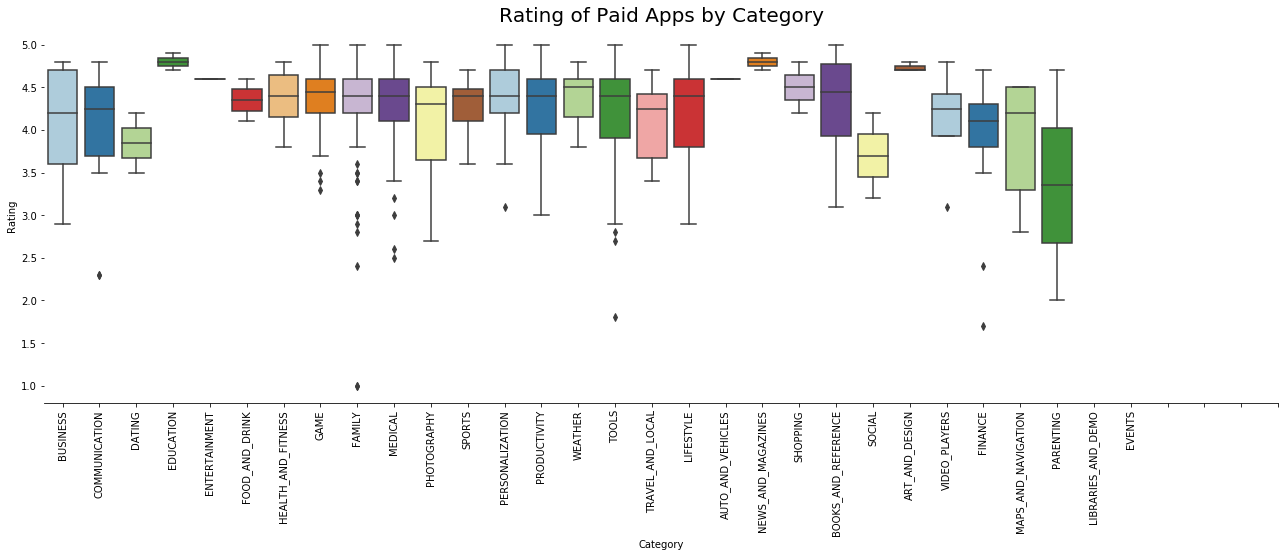

In [42]:
# Paid apps Rating distributon boxplots by app category
plt.figure(figsize=(6, 10))

g = sns.catplot(x="Category",y="Rating",data=df[df.Type=='Paid'], kind="box", aspect= 3, height=6,
palette = "Paired")

g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")

plt.title('Rating of Paid Apps by Category', size=20)

### Apps Size EDA

#### Basic Statistics

In [43]:
# app size statistic
df.Size.describe()

count    9644.000000
mean       32.429376
std        96.546950
min         0.000000
25%         3.400000
50%        10.000000
75%        28.000000
max      1020.000000
Name: Size, dtype: float64

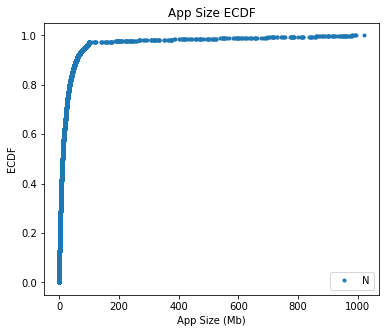

In [44]:
# app size cumulative distribution

plt.figure(figsize=(6, 5))
x_30, y_30 = ecdf(df.Size)

plt.plot(x_30, y_30, marker='.', linestyle='none')

plt.legend(('Number of Reviews'), loc='lower right')
plt.xlabel('App Size (Mb)')
plt.ylabel('ECDF')
plt.title('App Size ECDF')
plt.show()

#### Size Distribution By Category

Text(0.5, 1.0, 'App Size by Category')

<Figure size 432x720 with 0 Axes>

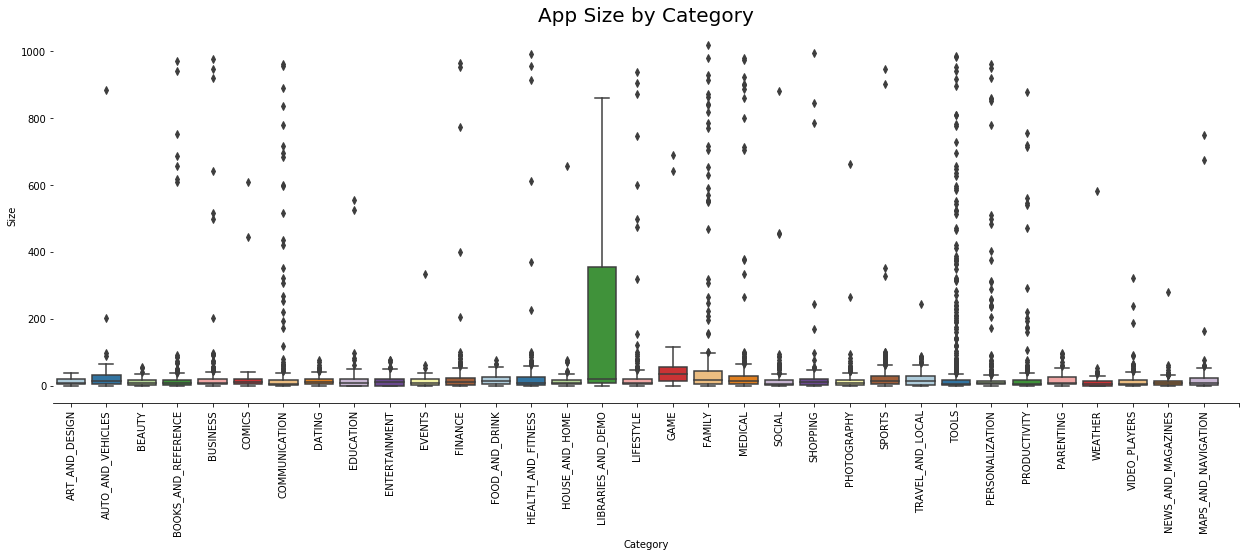

In [45]:
# distribution of app sizes by catebory
plt.figure(figsize=(6, 10))

g = sns.catplot(x="Category",y="Size",data=df, kind="box", aspect= 3, height=6,
palette = "Paired")

g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Size")

plt.title('App Size by Category', size=20)

### Price EDA

#### ECDF

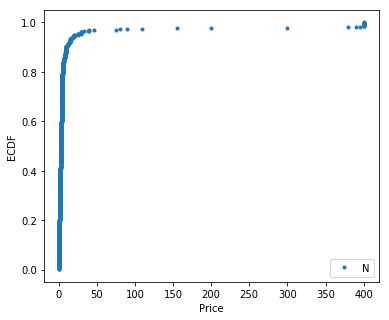

In [46]:
# price ECDF
plt.figure(figsize=(6, 5))
x_30, y_30 = ecdf(df[df.Type=='Paid']['Price'])

plt.plot(x_30, y_30, marker='.', linestyle='none')

plt.legend(('Number of Reviews'), loc='lower right')
plt.xlabel('Price')
plt.ylabel('ECDF')

plt.show()

#### Extreme Outliers

In [47]:
# price extreme outliers 
df[df['Price']> 150].head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up


In most cases these are junk apps, so we can drop them

In [48]:
# drop price outliers
df = df[df['Price']< 150]

#### Price Distribution by Category

Text(0.5, 1.0, 'App Price by Category')

<Figure size 432x720 with 0 Axes>

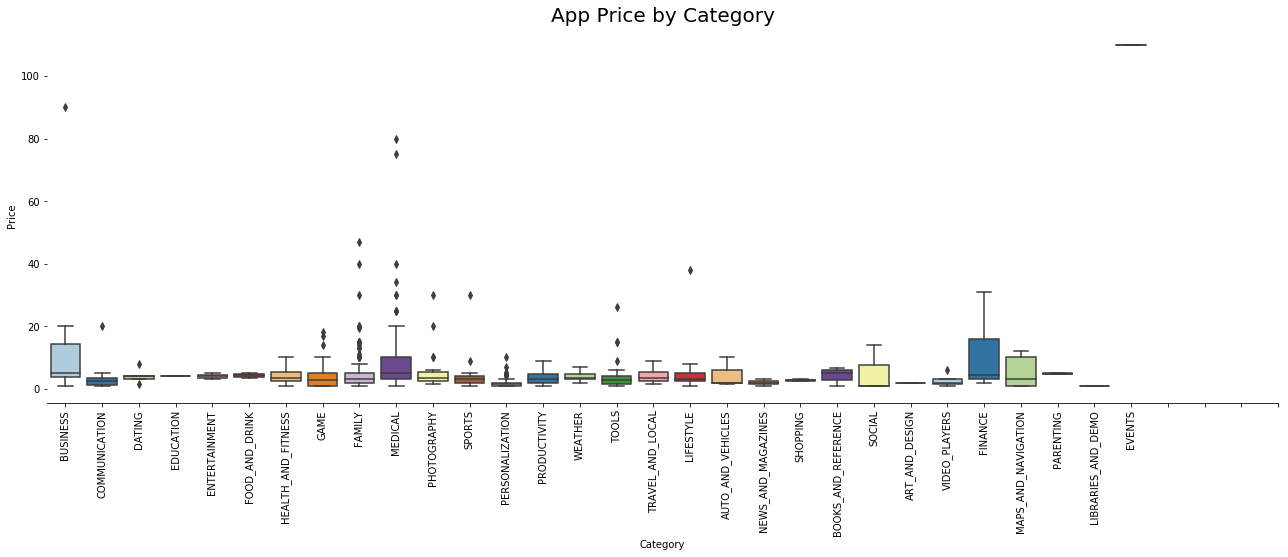

In [49]:
# price distributions by category
plt.figure(figsize=(6, 10))

g = sns.catplot(x="Category",y="Price",data=df[df.Type=='Paid'], kind="box", aspect= 3, height=6,
palette = "Paired")

g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Price")

plt.title('App Price by Category', size=20)

## Sentiment Analysis of Reviews

### Reviews Dataset

In [50]:
reviews.shape

(64295, 5)

In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [52]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [53]:
reviews.App.nunique()

1074

Data Frame contain 1017 unique apps reviews

### Data Preparation

In [54]:
# drop nans from reviews
reviews = reviews[pd.notnull(reviews['Translated_Review'])]

In [55]:
reviews['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [56]:
# create numerical labels
reviews['Target'] = reviews['Sentiment'].replace({'Positive': 1, 'Neutral':0, 'Negative': -1})

### EDA

 - 1: Positive
 - 0: Neural
 - -1: Negative

Text(0.5, 1.0, 'Target distributiuon')

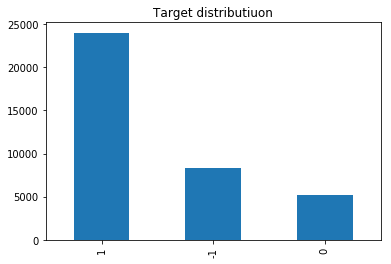

In [57]:
# label distribution
reviews['Target'].value_counts().plot(kind='bar').set_title('Target distributiuon')

Multi-class classification problem

### Tokenization (TFIDF)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [59]:
# vectorizer and arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=4000, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(reviews.Translated_Review)

# ransform vectorizer
X_txt = vect.transform(reviews.Translated_Review)

# transform to a df
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 1 rows of the DataFrame: ', X.head(1))

Top 1 rows of the DataFrame:     aap  abc  ability  able  able access  able change  able choose  \
0  0.0  0.0      0.0   0.0          0.0          0.0          0.0   

   able connect  able make  able play  ...   yo  yoga  young  youtube   yr  \
0           0.0        0.0        0.0  ...  0.0   0.0    0.0      0.0  0.0   

   yrs  zero  zip  zone  zoom  
0  0.0   0.0  0.0   0.0   0.0  

[1 rows x 4000 columns]


### Baseline Model Logistic Regression

In [60]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [61]:
# train test data
y = np.array(reviews['Target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

In [62]:
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy of logistic regression (train data): ', log_reg.score(X_train, y_train))
print('Accuracy of logistic regression (validation data): ', log_reg.score(X_test, y_test))

Accuracy of logistic regression (train data):  0.9152119700748129
Accuracy of logistic regression (validation data):  0.887143315165117


In [63]:
y_predict = log_reg.predict(X_test)

In [64]:
print('Accuracy score of test data: ', accuracy_score(y_test, y_predict))
print('Confusion matrix of test data: \n', confusion_matrix(y_test, y_predict)/len(y_test))

Accuracy score of test data:  0.887143315165117
Confusion matrix of test data: 
 [[0.16778882 0.00887036 0.04435182]
 [0.00555734 0.10452068 0.02767981]
 [0.01325211 0.01314524 0.61483381]]


### Tuning

In [65]:
# tuning funcion
def Logreg_tuning(X, y):
    Logreg_model = LogisticRegression(random_state=42, penalty='l1')
    
    param_grid = {"C": [1, 1.2, 1.3]               
                 }
    
    Logreg_grid = GridSearchCV(Logreg_model, param_grid, cv=4)
    Logreg_grid.fit(X, y)
    
    y_pred = Logreg_grid.predict(X)

    print('accuracy_score: ',accuracy_score(y, y_pred))   

    return  Logreg_grid.best_params_, Logreg_grid.best_score_

In [66]:
# logreg tuning and score
Logreg_tuning(X, y)

accuracy_score:  0.931894087156331


({'C': 1.3}, 0.8950490287760173)